In [1]:
import numpy as np
import matplotlib as plt
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [ ]:
ccle = np.load("ccle/data.npy")

In [3]:
drugbank = np.load("drugbank/data.npy")

In [ ]:
gdsc = np.load("gdsc/data.npy")

In [2]:
offside = np.load("offside/data.npy").astype(np.int32)

In [ ]:
pdx = np.load("pdx/data.npy")

In [10]:
repurposing_hub = np.load("repurposing_hub/data.npy")

In [9]:
sider = np.load("sider/data.npy")

In [2]:
stitch = np.load("stitch/data_900.npy").astype(np.int32)

In [10]:
#drugbankY = drugbank[:, -1] #classification
#ffsideY = offside[:, -1] #classification
#repurposing_hubY = repurposing_hub[:, -1] #classification
siderY = sider[:, -1] #classification
#stitchY = stitch[:, -1] #classification

In [11]:
#drugbank = drugbank[:, :-1]
#offside = offside[:, :-1]
#repurposing_hub = repurposing_hub[:, :-1]
sider = sider[:, :-1]
#stitch = stitch[:, :-1]

In [20]:
print(repurposing_hub)

[[-0.04701325  0.05209796 -0.07859404 ... -0.012892    0.030146
  -0.019113  ]
 [-0.04701325  0.05209796 -0.07859404 ... -0.068842    0.0088569
   0.0045852 ]
 [-0.04701325  0.05209796 -0.07859404 ... -0.092859   -0.12507
   0.10246   ]
 ...
 [ 0.01184312 -0.0263526   0.17543857 ... -0.055181   -0.077086
   0.051311  ]
 [ 0.01184312 -0.0263526   0.17543857 ...  0.040024   -0.10413
   0.20616   ]
 [ 0.01184312 -0.0263526   0.17543857 ... -0.19514    -0.0080206
  -0.1556    ]]


In [5]:
def analysis(X, y):
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    nb_class = GaussianNB()
    accuracies = []
    auroc_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        n_components = min(X_train.shape[1], 693)
        pca = PCA(n_components = n_components)
        
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.fit_transform(X_test)
        
        
        nb_class.fit(X_train_pca, y_train)
        
        y_pred = nb_class.predict(X_test_pca)
        
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        y_proba = nb_class.predict_proba(X_test_pca)[:, 1]
        auroc = roc_auc_score(y_test, y_proba)
        auroc_scores.append(auroc)
        
    for fold, (accuracy, auroc) in enumerate(zip(accuracies, auroc_scores), start=1):
        print(f"Fold {fold}: Accuracy = {accuracy: .4f}, AUROC = {auroc: .4f}")
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    average_accuracy = np.mean(accuracies)
    average_auroc = np.mean(auroc_scores)
    print("\nAverage Accuracy:", average_accuracy)
    print("Average AUROC Score:", average_auroc)
    cm_display.plot(cmap='viridis')

In [6]:
def linAnalysisClass(X, y):
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    auc_scores = []
    accuracy_scores = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred_continuous = model.predict(X_test)
        auc = roc_auc_score(y_test, y_pred_continuous)
        auc_scores.append(auc)

        y_pred_class = [1 if pred > np.mean(y_pred_continuous) else -1 for pred in y_pred_continuous]
        accuracy = accuracy_score(y_test, y_pred_class)
        accuracy_scores.append(accuracy)

        print(f"Fold {i}: AUC ROC = {auc}, Accuracy = {accuracy}")
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    average_auc = np.mean(auc_scores)
    average_accuracy = np.mean(accuracy_scores)
    
    print("Average AUC ROC Score:", average_auc)
    print("Average Accuracy Score:", average_accuracy)
    cm_display.plot(cmap='viridis')

Fold 1: Accuracy =  0.6518, AUROC =  0.6903
Fold 2: Accuracy =  0.6466, AUROC =  0.6816
Fold 3: Accuracy =  0.6456, AUROC =  0.6798

Average Accuracy: 0.647965274935189
Average AUROC Score: 0.6839139754862097


AttributeError: module 'matplotlib' has no attribute 'show'

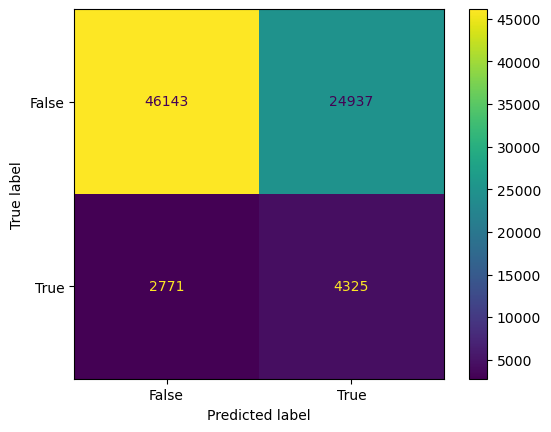

In [7]:
analysis(drugbank, drugbankY)

Fold 1: AUC ROC = 0.7993552029725977, Accuracy = 0.7022615636512485
Fold 2: AUC ROC = 0.7933280522670427, Accuracy = 0.6986926934097422
Fold 3: AUC ROC = 0.7971486032220552, Accuracy = 0.7038733115022513
Average AUC ROC Score: 0.7966106194872319
Average Accuracy Score: 0.7016091895210806


AttributeError: module 'matplotlib' has no attribute 'show'

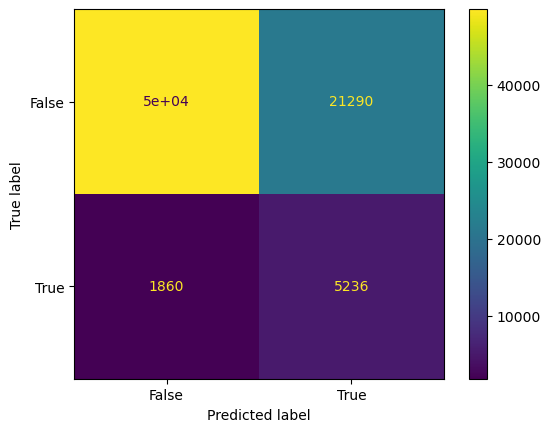

In [10]:
linAnalysisClass(drugbank, drugbankY)

Fold 1: Accuracy =  0.6509, AUROC =  0.6159
Fold 2: Accuracy =  0.6506, AUROC =  0.6195
Fold 3: Accuracy =  0.6500, AUROC =  0.6150

Average Accuracy: 0.650498074593676
Average AUROC Score: 0.6167905751098147


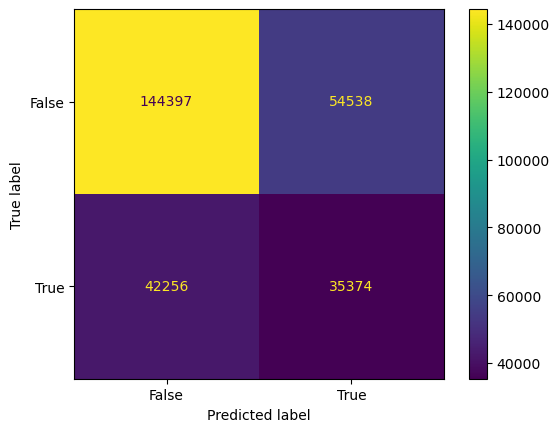

In [7]:
analysis(offside, offsideY)

Fold 1: AUC ROC = 0.6956644945115316, Accuracy = 0.7368141304937357
Fold 2: AUC ROC = 0.6966477609484184, Accuracy = 0.7390848444307848
Fold 3: AUC ROC = 0.6963013662528178, Accuracy = 0.7371974038652758
Average AUC ROC Score: 0.6962045405709226
Average Accuracy Score: 0.737698792929932


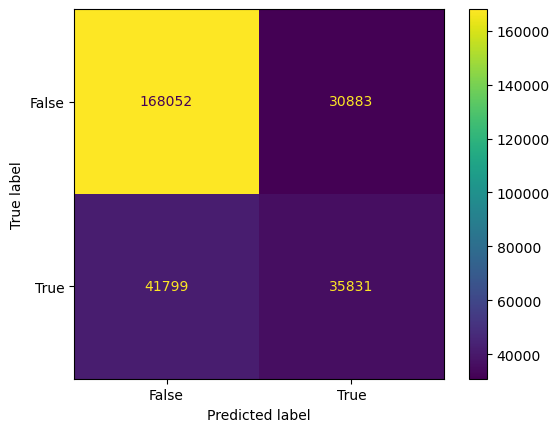

In [8]:
linAnalysisClass(offside, offsideY)

Fold 1: Accuracy =  0.8257, AUROC =  0.6653
Fold 2: Accuracy =  0.8309, AUROC =  0.6690
Fold 3: Accuracy =  0.8452, AUROC =  0.6337

Average Accuracy: 0.8339231593909778
Average AUROC Score: 0.6559913959687306


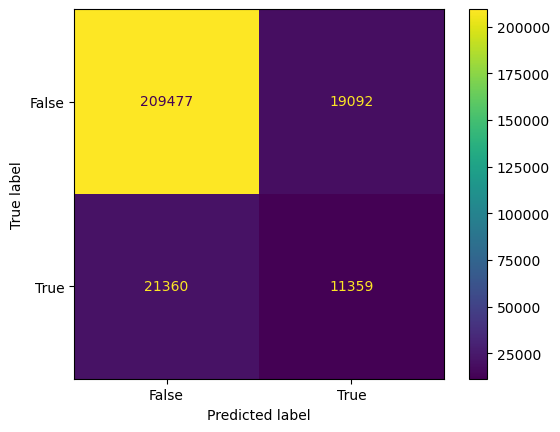

In [12]:
analysis(sider, siderY)

Fold 1: AUC ROC = 0.7884572137936341, Accuracy = 0.7256371297681877
Fold 2: AUC ROC = 0.7887470019510479, Accuracy = 0.7265403442165571
Fold 3: AUC ROC = 0.7875675084939614, Accuracy = 0.7265163344661829
Average AUC ROC Score: 0.7882572414128811
Average Accuracy Score: 0.7262312694836425


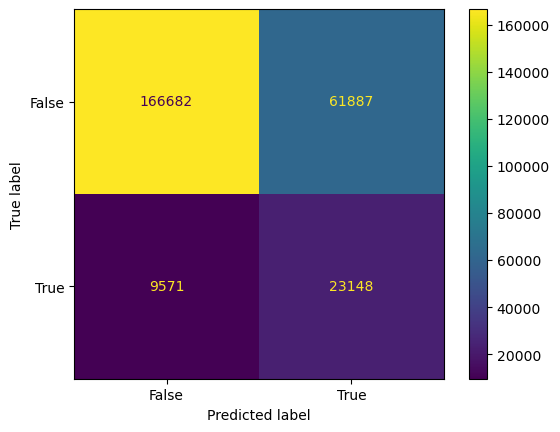

In [13]:
linAnalysisClass(sider, siderY)

Fold 1: Accuracy =  0.1148, AUROC =  0.5264
Fold 2: Accuracy =  0.1195, AUROC =  0.5245
Fold 3: Accuracy =  0.1259, AUROC =  0.5104

Average Accuracy: 0.12008717444320187
Average AUROC Score: 0.5204404341658798


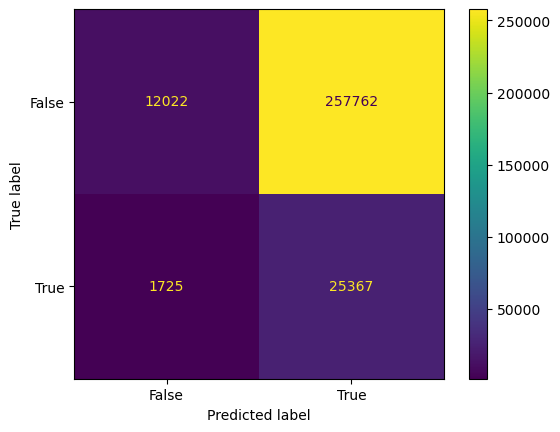

In [7]:
analysis(stitch, stitchY)

Fold 1: AUC ROC = 0.5407643956014925, Accuracy = 0.8938614101510395
Fold 2: AUC ROC = 0.5388297953579079, Accuracy = 0.8918302590980746
Fold 3: AUC ROC = 0.5408143572373852, Accuracy = 0.8905199477222814
Average AUC ROC Score: 0.5401361827322618
Average Accuracy Score: 0.8920705389904651


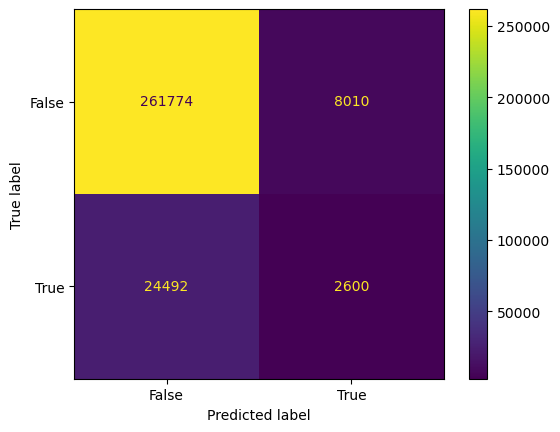

In [8]:
linAnalysisClass(stitch, stitchY)

In [ ]:
analysis(repurposing_hub, repurposing_hubY)

In [ ]:
linAnalysisClass(repurposing_hub, repurposing_hubY)

In [ ]:
def linAnalysis(X):
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    rmse_scores = []
    accuracy_scores = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]

        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_pca, X_train)

        y_pred = model.predict(X_test_pca)
        print(y_pred)
        rmse = np.sqrt(mean_squared_error(X_test, y_pred))
        rmse_scores.append(rmse)

        print(f"Fold {i}: RMSE = {rmse}")
        
    average_rmse = np.mean(rmse_scores)
    print("Average RMSE Score:", average_rmse)

In [ ]:
linAnalysis(ccle)

In [ ]:
linAnalysis(pdx)

In [ ]:
linAnalysis(gdsc)